Missing values in each column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Logistic Regression Accuracy: 0.9737
              preci

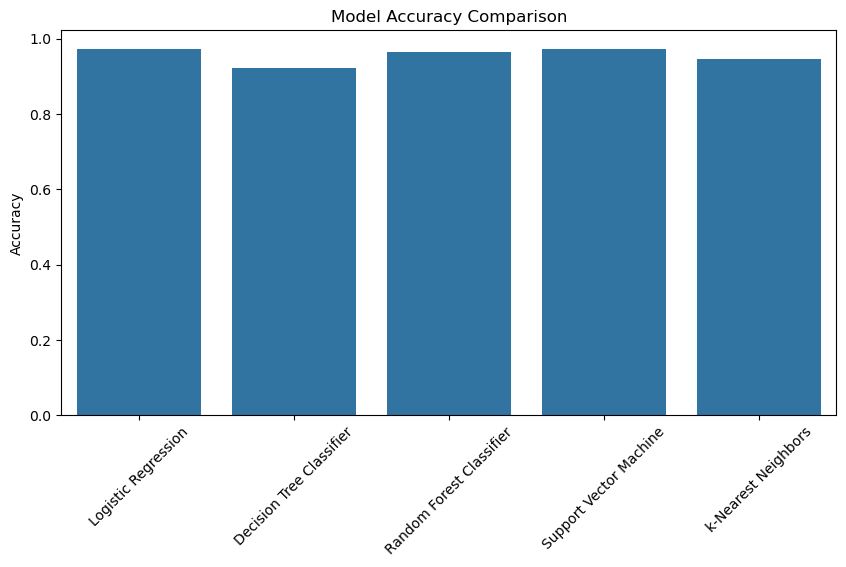

In [25]:
# Import necessary libraries  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.datasets import load_breast_cancer  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

# 1. LOADING AND PREPROCESSING  


# Load the breast cancer dataset  
data = load_breast_cancer()  
X = data.data  
y = data.target  

# Convert to DataFrame for easier manipulation  
df = pd.DataFrame(X, columns=data.feature_names)  
df['target'] = y  

# Check for missing values  
print("Missing values in each column:\n", df.isnull().sum())  

# Feature scaling  
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)  
 


# 2. CLASSIFICATION ALGORITHM IMPLEMENTATION   

# Split the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  

# Initialize classifiers  
classifiers = {  
    "Logistic Regression": LogisticRegression(max_iter=10000),  
    "Decision Tree Classifier": DecisionTreeClassifier(),  
    "Random Forest Classifier": RandomForestClassifier(),  
    "Support Vector Machine": SVC(),  
    "k-Nearest Neighbors": KNeighborsClassifier()  
}  

# Train and evaluate each classifier  
results = {}  
for name, clf in classifiers.items():  
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)  
    results[name] = accuracy  
    print(f"{name} Accuracy: {accuracy:.4f}")  
    print(classification_report(y_test, y_pred))  

# 3. MODEL COMPARISON  

# Compare the performance of the classifiers  
best_model = max(results, key=results.get)  
worst_model = min(results, key=results.get)  

print("\nModel Comparison:")  
print(f"Best Model: {best_model} with accuracy {results[best_model]:.4f}")  
print(f"Worst Model: {worst_model} with accuracy {results[worst_model]:.4f}")  

# Visualize the results  
plt.figure(figsize=(10, 5))  
sns.barplot(x=list(results.keys()), y=list(results.values()))  
plt.title("Model Accuracy Comparison")  
plt.ylabel("Accuracy")  
plt.xticks(rotation=45)  
plt.show()  